## Imports and Setup

In [1]:
import os
import pandas as pd
import geopandas as gpd
import fastdup

import sys
sys.path.insert(0, "../utils/")
import visual_utils
import config_utils

import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

cwd = os.path.dirname(os.getcwd())
%load_ext autoreload
%autoreload 2

## Data Config

In [2]:
iso = "YEM"
cwd = os.path.dirname(os.getcwd())
config_file = os.path.join(cwd, 'configs/sat_configs/sat_config_512x512_60cm.yaml')
config = config_utils.create_config(config_file)

## Visualize Images

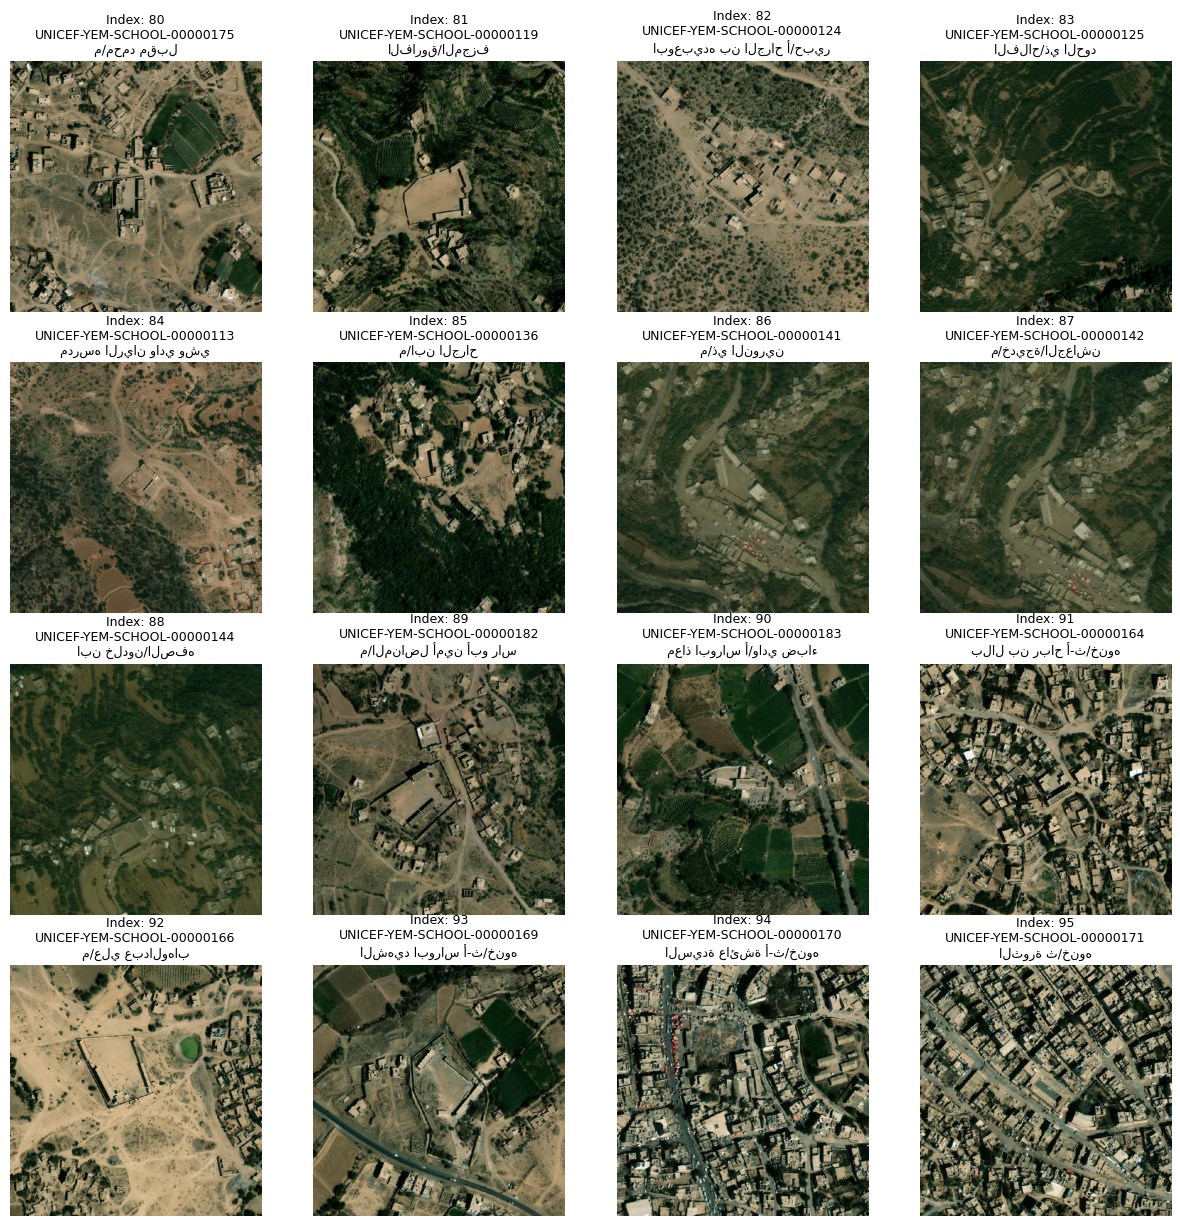

In [16]:
visual_utils.inspect_images(config, iso, category="school", start_index=80)

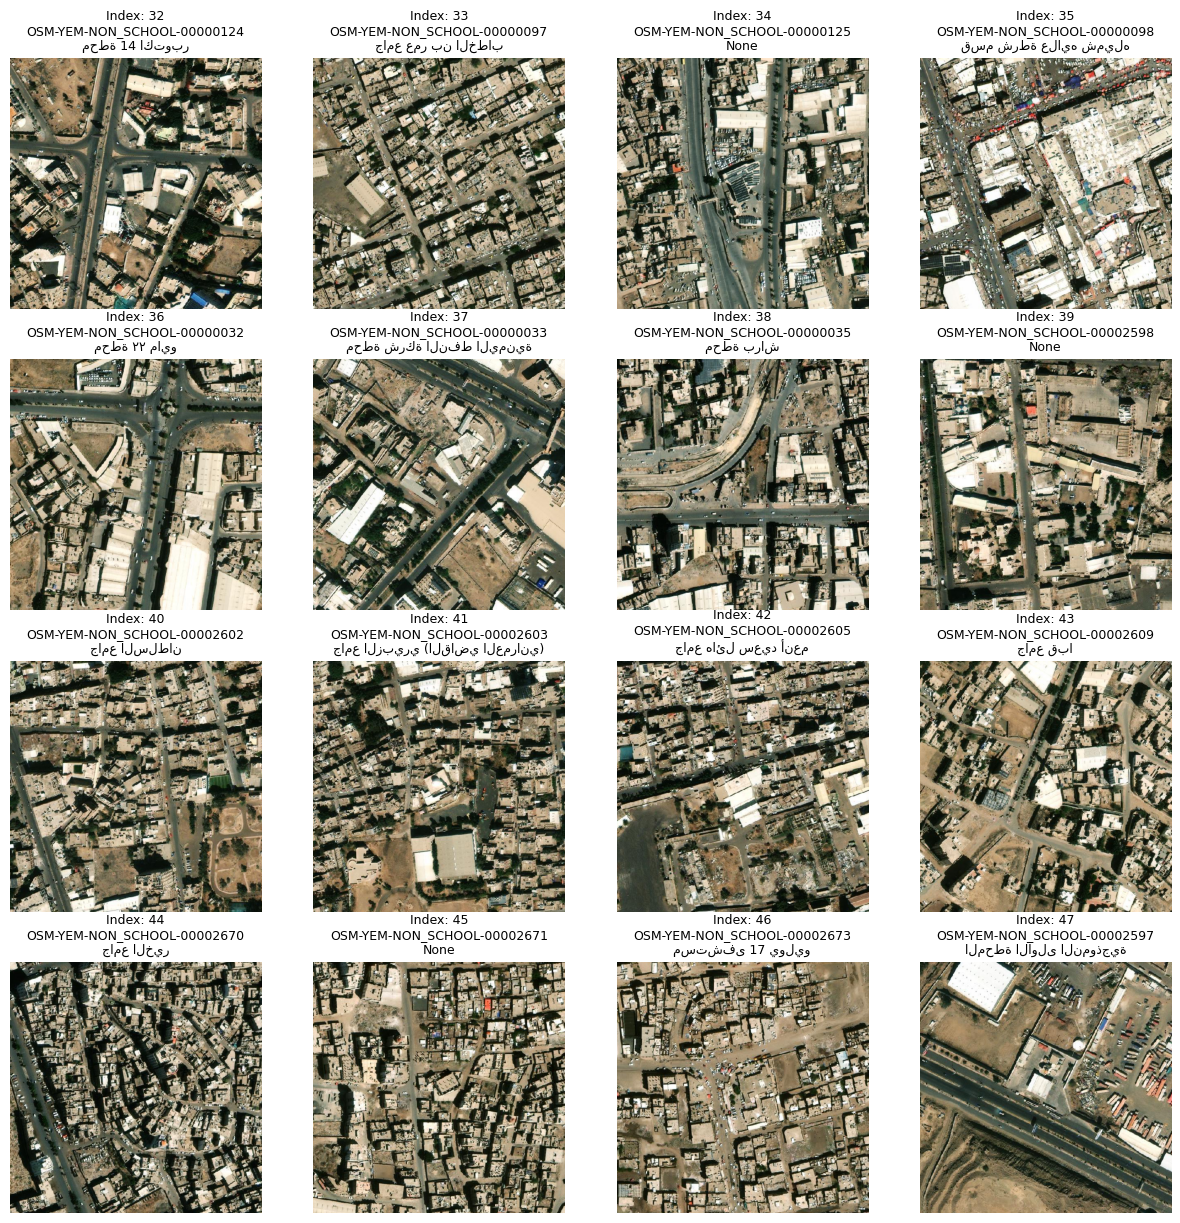

In [17]:
visual_utils.inspect_images(config, iso, category="non_school", start_index=32)

## Inspect Points

In [18]:
index = 36
visual_utils.map_coordinates(config, index, category="non_school", iso=iso)

INFO:root:محطة ٢٢ مايو


## Fast Deduplication

In [7]:
image_dir = os.path.join(cwd, config["RASTERS_DIR"], config["DIR"], iso, "non_school")
fd = fastdup.create(input_dir=image_dir)
fd.run(model_path='dinov2b', cc_threshold=0.95, overwrite=True);

FastDup Software, (C) copyright 2022 Dr. Amir Alush and Dr. Danny Bickson.
2023-12-04 08:13:16 [INFO] Found resent/efficientnet/dinov2 model, setting up normalization
2023-12-04 08:13:16 [INFO] Going to loop over dir /home/itingzon.unicef/giga/data/rasters/maxar/512x512_60cm/GRD/non_school
2023-12-04 08:13:16 [INFO] Found total 143 images to run on, 143 train, 0 test, name list 143, counter 143 
2023-12-04 08:13:19 [INFO] Found total 143 images to run onstimated: 0 Minutes
2023-12-04 08:13:19 [INFO] 22) Finished write_index() NN model
2023-12-04 08:13:19 [INFO] Stored nn model index file work_dir/nnf.index
2023-12-04 08:13:19 [INFO] Total time took 3432 ms
2023-12-04 08:13:19 [INFO] Found a total of 0 fully identical images (d>0.990), which are 0.00 % of total graph edges
2023-12-04 08:13:19 [INFO] Found a total of 0 nearly identical images(d>0.980), which are 0.00 % of total graph edges
2023-12-04 08:13:19 [INFO] Found a total of 203 above threshold images (d>0.900), which are 70.98 %

Generating gallery:   0%|          | 0/13 [00:00<?, ?it/s]

Finished OK. Components are stored as image files work_dir/galleries/components_[index].jpg
Stored components visual view in  work_dir/galleries/components.html
Execution time in seconds 0.7
########################################################################################
Would you like to see awesome visualizations for some of the most popular academic datasets?
Click here to see and learn more: https://app.visual-layer.com/vl-datasets?utm_source=fastdup
########################################################################################



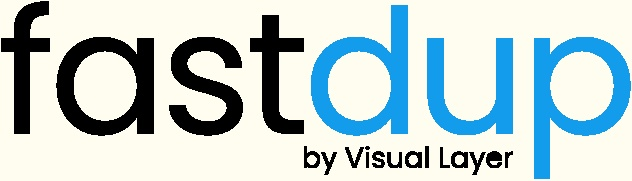
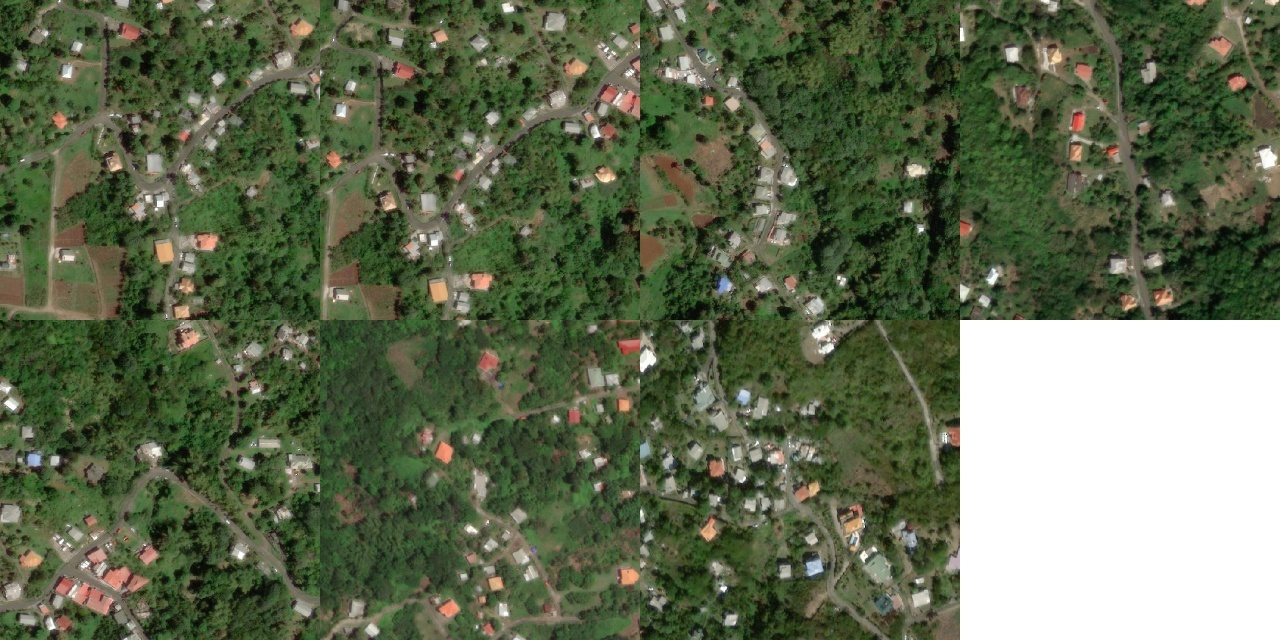
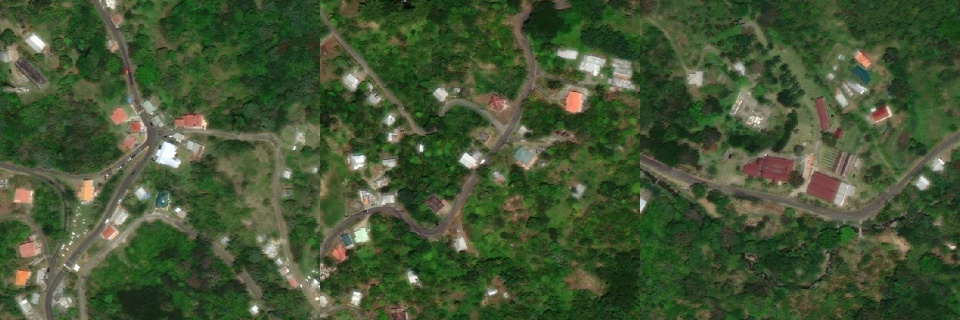
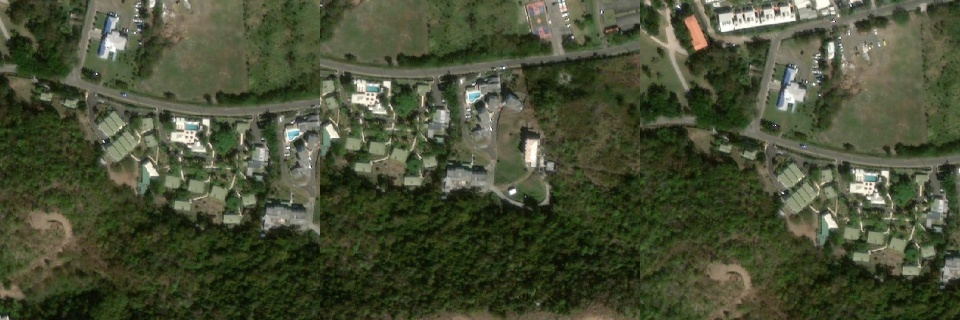
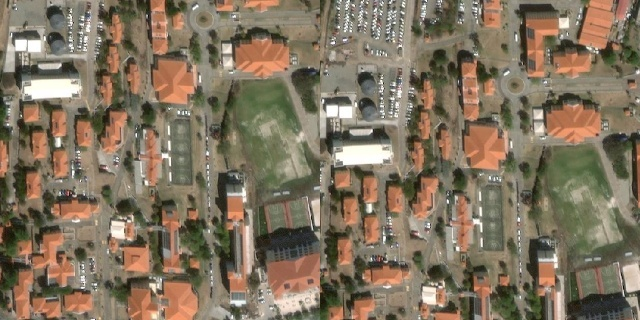
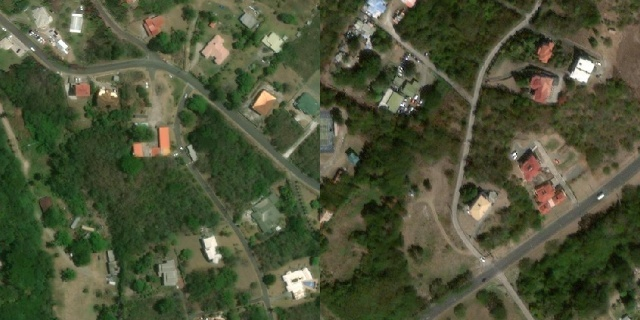
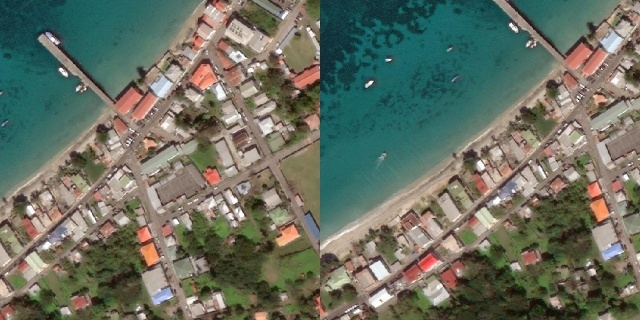
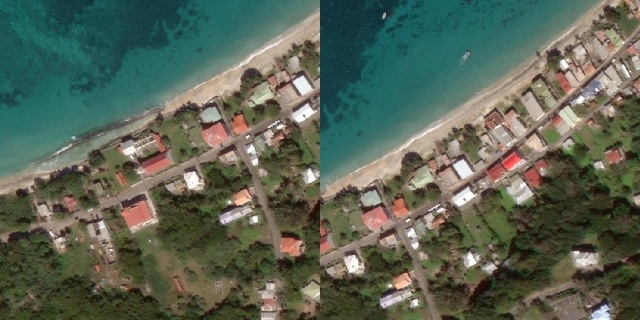
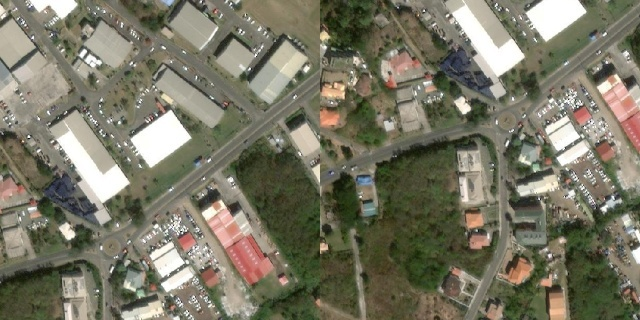
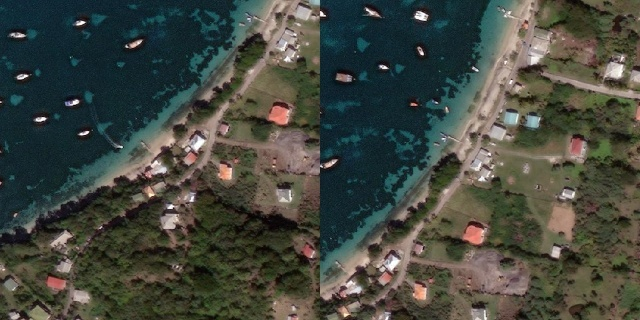
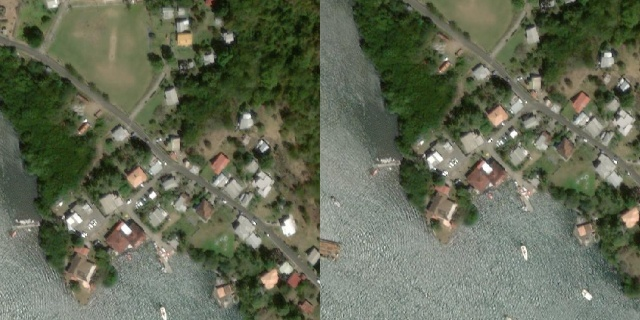
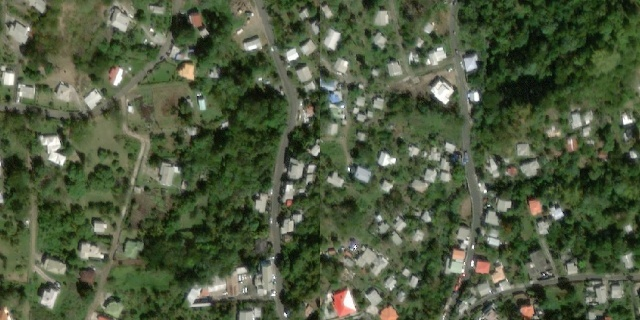
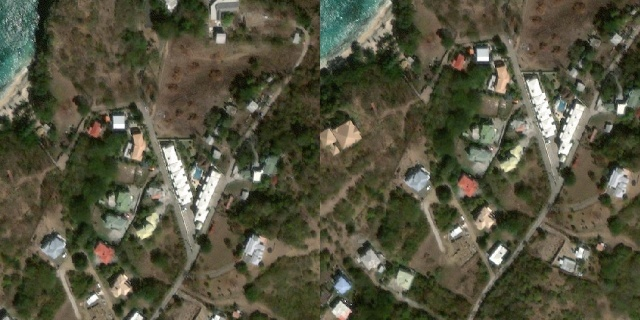
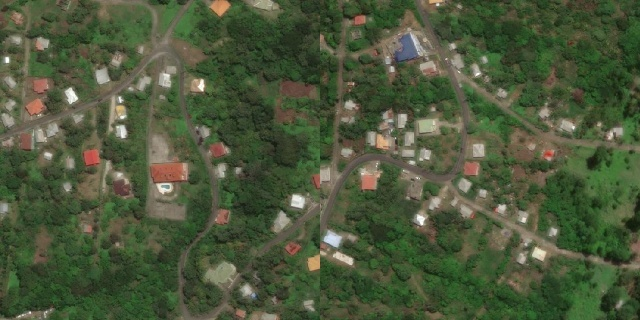

In [8]:
fd.vis.component_gallery();

## Data Validation

In [10]:
visual_utils.data_cleaning(config, iso, category="school", start_index=0)

GridspecLayout(children=(Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\x00\x00\x00\x02\x00\x08…